# TP 1 : Interpolation polynomiale

Le but de l'interpolation polynomiale est de construire un polynôme $p_n(x)$ de degré au plus $n$ satisfaisant
$$
  p_n(x_i) = y_i\quad \text{pour} \quad i = 0,1,2,\dots,n,
$$

où les $(x_i,y_i)$ sont les points d'interpolation donnés tels que
$a\leq x_0< x_1<\dots<x_{n}\leq b$.

Dans les exercices suivants, on discutera de différentes méthodes pour construire un polynôme d'interpolation.

## Exercice 1 : Polynômes de Lagrange
En utilisant la formule de Lagrange, on construit le polynôme d'interpolation
$$
  p_n(x) = \sum_{i=0}^{n} y_i \ell_i(x)
  \quad\text{avec}\quad
  \ell_i(x) = \prod_{\substack{j=0\\ j\neq i}}^{n} \frac{x-x_j}{x_i-x_j}.
$$
On appelle les $\ell_i(x)$ polynômes de Lagrange. Dans cet exercice, vous allez implémenter cette formule d'interpolation.


### Exercice 1a)
---
> Écrivez deux fonctions :
>- `polynome_lagrange` qui implémente les polynômes de Lagrange, étant donné les points d'interpolation `x_inter` et les évalue aux points `x`.
>- `interpolation_lagrange` qui implémente l'interpolation de Lagrange, en utilisant `polynome_lagrange` ainsi que les points d'interpolation `x_inter` et `y_inter` et évalue ce polynôme aux points `x`. 
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def lag_poly(x, x_inter, i):
    """
    Returns:
        The i-th Lagrange polynomial evaluated at x (i.e. l_i(x))
    """
    fun = lambda j: (x - x_inter[j]) / (x_inter[i] - x_inter[j]) if i != j else 1
    return np.array([fun(j) for j in prod_idxs(i, len(x_inter))]).prod(axis=0)


def prod_idxs(i, size):
    """return array of (indices) js from 0 to n where each j != given i- """
    return np.delete(np.arange(size, dtype=int), i)


def test(size):
    x_inter = np.linspace(0, 1, size)
    x = np.linspace(0, 1, size)#[1]
    print("x_inter:", x_inter)
    print("x:", x)
    poly = lag_poly(x, x_inter, 1)
    #print("l_i:", poly)
    print("len(poly) : ", np.shape(poly))
    print("len(poly) : ", np.shape(poly.prod(axis=0)))
    lis = polynome_lagrange(x, x_inter)
   # for i in range(len(lis)):
        #print(f"\tl_{i} =", lis[i], "\n")
    print("shape(polynome_lagrange)", np.shape(polynome_lagrange(x, x_inter)))
    """ print(len(x_inter))
    print(len(lis[0]))
    print(len(x)) """


def polynome_lagrange(x, x_inter):
    """
    Polynôme de Lagrange defini par points d'interpolation x_inter, evalués à x

    Renvoie une liste `lagrange_liste` de la même longueur que x_inter où la
    ième entrée correspond au polynôme de Lagrange l_i(x).

    x est un vecteur, alors chaque entrée de lagrange_liste est un
    vecteur de la même taille que x.
    """
    n = len(x_inter)
    return np.array([lag_poly(x, x_inter, i) for i in range(n)])

    # ÉCRIVEZ VOTRE SOLUTION ICI


def interpolation_lagrange(x, x_inter, y_inter):
    """
    Polynôme de Lagrange defini par points d'interpolation x_inter et y_inter, evalués à x

    x est un vecteur.
    On renvoie un vecteur de même taille que x.
    """
    npArr = np.array([y_inter[i]*lag_poly(x, x_inter, i) for i in range(len(y_inter))])

    return np.array([y_inter[i]*lag_poly(x, x_inter, i) for i in range(len(y_inter))]).sum(axis=0)

    # ÉCRIVEZ VOTRE SOLUTION ICI
#test(8)



In [2]:
def test_polynome_lagrange():
    for size in [5, 10]:
        x_inter = np.linspace(0, 1, size)
        x = np.linspace(0, 1, size)
        poly = polynome_lagrange(x, x_inter)
        assert (
            len(poly) == size
        ), "La longueur de la sortie doit être la même que celle de x_inter"
        assert np.shape(poly) == (
            size,
            size,
        ), "La taille de chaque entrée doit correspondre à celle de x"
        assert np.allclose(
            poly, np.eye(size)
        ), "Si x = x_inter, alors le polynome devrait être la matrice d'identité"

test_polynome_lagrange()

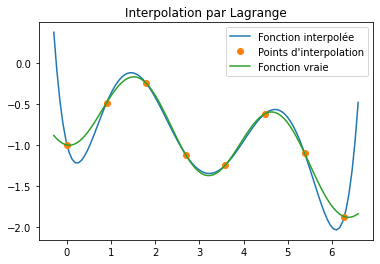

In [3]:
def test_interpolation(interpolation_method, name):
    num_points = 8

    def plot_function(x):
        return np.sin(x) ** 2 - np.exp(x / 10)

    x_inter = np.linspace(0, 2 * np.pi, num_points)
    y_inter = plot_function(x_inter)
    x_plot = np.linspace(-0.3, 2.1 * np.pi, 100)
    y_array = interpolation_method(x_plot, x_inter, y_inter)
    
    assert y_array.shape == x_plot.shape, "Erreur de taille"
    assert np.allclose(
        interpolation_method(x_inter, x_inter, y_inter), y_inter
    ), "p(x_i) = x_i doit etre vrais pour tous les noeuds  d'interpolation"

    plt.plot(x_plot, y_array, label="Fonction interpolée")
    plt.plot(x_inter, y_inter, "o", label="Points d'interpolation")
    y_vrais = plot_function(x_plot)
    plt.plot(x_plot, y_vrais, label="Fonction vraie")
    plt.title(f"Interpolation par {name}")
    plt.legend()
    
test_interpolation(interpolation_lagrange, "Lagrange")

On peut réécrire la formule de Lagrange dans la forme modifiée suivante qui utilise les poids $w_{i}$:
$$
    p_n(x) = \ell(x)\sum_{i=0}^{n} y_i\frac{w_i}{x-x_i} 
    \quad\text{avec}\quad
    \ell(x) = \prod_{j=0}^{n} {x-x_j},\quad
    w_i = \left(\prod_{\substack{j=0\\ j\neq i} }^{n} {x_i-x_j}\right)^{-1},\tag{1}
$$
ainsi que dans la forme barycentrique :
$$
    p_n(x) = \left({\displaystyle \sum_{i=0}^{n}
    y_i\frac{w_i}{x-x_i}}\right)
    \left( {\displaystyle \sum_{i=0}^{n}
    \frac{w_i}{x-x_i}}\right)^{-1}. \tag{2}
$$
Les fonctions ci-dessus sont valables seulement si $x\neq x_j$, autrement $p_n(x_j) = y_j$. Dans cet exercice, vous allez implémenter ces deux formules.

---
> __Reflexion__ : Quel est l'avantage de telles formules comparé au polynôme de Lagrange classique ? 
---

### Exercice 1 b) i)
--- 
> Ecrivez une fonction `poids(x)` qui retourne un vecteur avec les poids $w_i$ définis ci-dessus. Ce vecteur a la même taille que `x`.
---

In [4]:
import numpy as np

"""Return array to multiplicate element wise to get all the w_i at step j (i.e. product of (xi - xk) until k =j) """
def stepj(x, j, n): return np.array([(1 if i == j else 1 / (x[i] - x[j])) for i in range(n)])


def poids(x):
    "Retourne un vecteur de poids de la même taille que `x`."
    n = len(x)
    w = np.ones_like(x)
    for j in range(n): w *= stepj(x, j, n)
    return w

    # ÉCRIVEZ VOTRE SOLUTION ICI
    # Indice : mettez à jour le vecteur de w par multiplication avec des
    # éléments de la forme x[i] - x[j].


In [5]:
def test_poids():
    x = [0.12, 0.34, 0.56, 0.98]
    w = poids(x)
    assert len(w) == len(x)
    assert np.allclose(w, [-12.0123006, 32.28305785, -24.59661551, 4.32585825])
    x = np.linspace(0, 1, 10)
    w = poids(x)
    assert np.abs(np.sum(w)) < 1e-10
    assert len(w) == len(x)


test_poids()


### Exercice 1 b) ii)
---
> Ecrivez une fonction `interpolation_lagrange_v2` qui calcule le polynôme d'interpolation de Lagrange en utilisant la méthode modifiée $(1)$. Réutilisez la fonction `poids` de l'exercice précédent. Assurez-vous de vérifier si $x = x_i$ et de rendre $p(x)=y_i$ dans ce cas.
---

C:\Users\noahm\AppData\Local\Temp\ipykernel_16872\3968031761.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return val in x


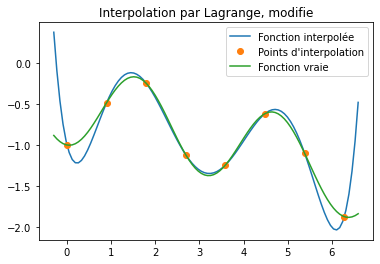

In [6]:
def eqOrIn(_x, val):
    """Checks if _x contains val (if _x is an array) or if val == x (if it is a scalar)"""
    x = np.array(_x)
    return val in x

def plot_function(x):
    return np.sin(x) ** 2 - np.exp(x / 10)

def interpolation_lagrange_v2(x, x_inter, y_inter):
    """
    Polynôme de Lagrange defini par points d'interpolation x_inter et y_inter, evalués à x

    On renvoie un vecteur de même taille que x.
    """
    n, w = len(x_inter), poids(x_inter)
    
    tmp_d = np.array([x - x_inter[i] for i in range(n)]) #? computes each x - x_i to be reused in computation of l(x) and of y_i / (x - x_i)
    
    d_filler = lambda i: y_inter[i] / (1 if eqOrIn(x, x_inter) else tmp_d[i])    
    v = [d_filler(i) for i in range(n)]

    l = np.prod(tmp_d, axis=0)
    dot_prod = np.sum([v[i] * w[i] for i in range(n)], axis=0) #np.dot(v,w)
    p_x = l * dot_prod
    return p_x


def test_interpolation(interpolation_method, name):
    num_points = 8

    def plot_function(x):
        return np.sin(x) ** 2 - np.exp(x / 10)

    x_inter = np.linspace(0, 2 * np.pi, num_points)
    y_inter = plot_function(x_inter)
    x_plot = np.linspace(-0.3, 2.1 * np.pi, 100)
    y_array = interpolation_method(x_plot, x_inter, y_inter)
    
    assert y_array.shape == x_plot.shape, "Erreur de taille"

    plt.plot(x_plot, y_array, label="Fonction interpolée")
    plt.plot(x_inter, y_inter, "o", label="Points d'interpolation")
    y_vrais = plot_function(x_plot)
    plt.plot(x_plot, y_vrais, label="Fonction vraie")
    plt.title(f"Interpolation par {name}")
    plt.legend()
    
test_interpolation(interpolation_lagrange_v2, "Lagrange, modifie")

### Exercice 1 b) iii)
---
> Même question que 1b ii), mais pour la variante barycentrique $(2)$ de la méthode de Lagrange.
---

C:\Users\noahm\AppData\Local\Temp\ipykernel_16872\1560983645.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return val in x


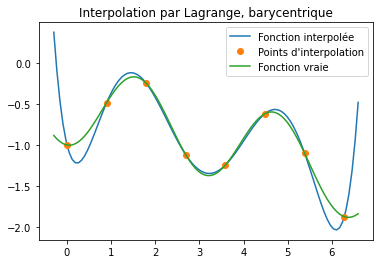

In [7]:
def eqOrIn(_x, val):
    """Checks if _x contains val (if _x is an array) or if val == x (if it is a scalar)"""
    x = np.array(_x)
    return val in x

def interpolation_lagrange_v3(x, x_inter, y_inter):
    """
    Polynôme de Lagrange defini par points d'interpolation x_inter et y_inter, evalués à x
    """
    n, w = len(x_inter), poids(x_inter)    
    tmp_d = np.array([x - x_inter[i] for i in range(n)]) 
    d_filler = lambda i: w[i] / (1 if eqOrIn(x, x_inter) else tmp_d[i])    

    tmp_serie = np.array([d_filler(i) for i in range(n)])
    serie_left = np.sum([tmp_serie[i] * y_inter[i] for i in range(n)], axis=0)
    serie_right = tmp_serie.sum(axis=0)
    
    """ for i in range(n):
        wi_over_x_xi = w[i] / (x - x_inter[i])
        serie_right += wi_over_x_xi
        serie_left += (wi_over_x_xi * y_inter[i]) """

    p_x = serie_left / serie_right
    
    return p_x
    
test_interpolation(interpolation_lagrange_v3, "Lagrange, barycentrique")


## Exercice 2 : Points de Chebychev

Dans les exercices précédents, on a utilisé des points d'interpolation équidistants.
En pratique, les points de Chebyshev sont souvent utilisées en abscisse.
Ces points sont définis sur l'intervalle $(-1,1)$ par
$$
  x_i = \cos \left(\frac{2i+1}{2n+2}\pi\right), \quad\text{pour}\quad
  i = 0,\dots, n.
$$
Le but de cet exercice est d'illustrer numériquement leur utilité.



### Exercice 2a) i)
---
> Implémentez une fonction `chebyshev_points(n)` qui retourne un vecteur avec les points de Chebyshev dans l'intervalle $(-1,1)$ pour un `n` donné. (faites attention : le vecteur est de taille `n+1`)  
> Puis implémentez une fonction `chebyshev_poids(n)` qui retourne un vecteur contenant les poids associés aux points de Chebyshev en utilisant la formule explicite suivante:
$$
  w_i = (-1)^i\frac{2^{n}}{n+1}\sin\theta_i, \quad \text{où} \quad \theta_i=\frac{(2i+1)\pi}{2n+2}, \quad \text{pour} \quad i=0,...,n.
$$

---

__Remarque__ : Cette formule explicite est dérivée en appliquant les formules d'interpolation $(1)$ et $(2)$ de l'exercice 1b) aux les points d'interpolation Chebychev. On peut aussi faire la même chose pour des points d'interpolation équidistants. 

In [8]:
import numpy as np
#* Shorthand for np.arange(n)
def npRge(n:int, inclusive: bool = False): return np.arange(n + (1 if bool else 0), dtype=int)

In [9]:
"Retourne les n points de Chebyshev" 
def chebyshev_points(n): return np.cos(np.pi/(n+1) * (npRge(n, True) + 0.5))
    # ÉCRIVEZ VOTRE SOLUTION ICI

def chebyshev_poids(n):
    "Retourne les n poids de Chebyshev"
    # ÉCRIVEZ VOTRE SOLUTION ICI
    idxs = npRge(n, inclusive=True)
    thetas = np.pi/(n+1) * (idxs + 0.5)
    ws = (2**n / (n+1)) * ((-1) ** idxs) * np.sin(thetas)

    return ws

n = 10
# On peut vérifier que les poids produit par chebyshev_poids(n) sont bien les mêmes
# que ceux produit par poids(chebyshev_points(n)) en utilisant np.allclose
np.allclose(poids(chebyshev_points(n)), chebyshev_poids(n))


True

In [10]:
def test_chebyshev_points():
    for size in [5, 10]:
        x = chebyshev_points(size)
        assert (
            len(x) == size + 1
        ), "Le nombre de points de Chebyshev doit être égal à n+1"
        assert (
            np.mean(x) < 1e-10
        ), "Les points de Chebyshev doivent être centrés"
    assert (
        np.abs(np.linalg.norm(chebyshev_points(7)) - 2) < 1e-8
    ), "Veuillez vérifier votre implémentation de chebyshev_points"


def test_chebyshev_poids():
    for size in [7, 10]:
        w = chebyshev_poids(size)
        assert np.shape(w) == (size + 1,), "Erreur de taille"
        assert np.allclose(
            np.abs(w), np.abs(w[::-1])
        ), "Les poids de Chebyshev sont symétriques"
        assert np.allclose(
            chebyshev_poids(size), poids(chebyshev_points(size))
        ), "Les poids de Chebyshev sont les mêmes que ceux produit par poids"


test_chebyshev_points()
test_chebyshev_poids()


### Exercice 2a) ii)
---
> Implémentez une fonction `equidistant_points(n)` qui, étant donné `n`, retourne un vecteur de points équidistants dans l'intervalle $(-1,1)$. (Faites attention : le vecteur est de taille `n+1`)  
> Puis implémentez une fonction `equidistant_poids(n)` qui retourne le vecteur de poids associés aux points équidistants en utilisant la formule explicite suivante:
$$
  w_i = \frac{(-1)^{n-i} }{h^n\,n!} \binom{n}{i}, \quad \text{où} \quad h=2/n ~~\text{(le pas de discrétisation)}
$$
> **Indice** : vous pouvez utiliser les fonctions `comb` et `factorial` de la librairie `scipy.special` pour calculer les coefficients binomiaux $\binom{n}{i}$ et les factorielles $n!$.
---

In [11]:
from scipy.special import comb, factorial


def equidistant_points(n): return np.linspace(-1, 1, num=n+1)
#return np.linspace(-1, 1, num=n+2, endpoint=False)[1:] #* n+2 because start=-1 and we want n+1 points in the interval ]-1, 1[ ==> we remove the 1st pt that is supposed to be -1

    #"Retourne les n+1 points d'équidistance entre -1 et 1"
    # ÉCRIVEZ VOTRE SOLUTION ICI


def equidistant_poids(n):
    "Retourne les n+1 poids des points équidistance entre -1 et 1"
    # ÉCRIVEZ VOTRE SOLUTION ICI
    i = npRge(n) #indices in [|0, n|] (integer interval)
    i_flp = -i + n #np.flip(i) #? n-i is just array of indices i but backwards (i.e. n-i = np.flip(i))
    ws = n**n/2**n * ((-1)**i_flp / (factorial(i_flp) * factorial(i)))
    
    #ws = 
    return ws    

n = 10

# On peut vérifier que les poids produit par equidistant_poids(n) sont bien les
# mêmes que ceux produit par poids(equidistant_points(n))
np.allclose(poids(equidistant_points(n)), equidistant_poids(n))


True

Pour equidistant_poids(n) chaque points devrait être espacé de $\frac{1 - (-1)}{n+2} = \frac{2}{n+2} $.
Le $k^{eme}$ élément vaut donc $-1 + (k \ \frac{2}{n+2})$ (pour $k \in [|1, n+1|]$)

#### NB:
> La valeur de test imposée qui est utilisée à la ligne 12 de `test_equidistant_points()` (`1.9364916731037085`) n'est juste seulement si on retourne des valeurs dans $[-1, 1]$ et non dans $(-1, 1)$ comme demandé dans l'énoncé.
>
> En effet pour n=8 on a:
> - ligne 8: les valeurs uniforméments réparties dans ]-1,1[ et 
> - ligne 9: celles dans [-1, 1]

In [12]:
def checkDist(arr):
    requiredValue = 1.9364916731037085
    nm = np.linalg.norm(arr)
    print(arr, f" size={len(arr)}", " norm =", nm)
    dist = np.abs(nm - requiredValue)
    print(f"distance to {requiredValue} (value imposed in test) =", dist)
    print("|| dist < 1e-8 ? :", dist < 1e-8, "||")
    print("____________________________________________________________")
n=8
checkDist(np.linspace(-1, 1, num=n+2, endpoint=False)[1:])
checkDist(np.linspace(-1, 1, num=n+1))

[-0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8]  size=9  norm = 1.5491933384829668
distance to 1.9364916731037085 (value imposed in test) = 0.3872983346207417
|| dist < 1e-8 ? : False ||
____________________________________________________________
[-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]  size=9  norm = 1.9364916731037085
distance to 1.9364916731037085 (value imposed in test) = 0.0
|| dist < 1e-8 ? : True ||
____________________________________________________________


In [13]:

def test_equidistant_points():
    for size in [5, 10]:
        x = equidistant_points(size)
        assert (
            len(x) == size + 1
        ), "Le nombre de points de Chebyshev doit être égal à n+1"
        assert (
            np.mean(x) < 1e-10
        ), "Les points de Chebyshev doivent être centrés"
    assert (
        np.abs(np.linalg.norm(equidistant_points(8)) - 1.9364916731037085)
        < 1e-8
    ), "Veuillez vérifier votre implémentation de equidistant_points"


def test_equidistant_poids():
    for size in [7, 10]:
        w = equidistant_poids(size)
        assert np.shape(w) == (size + 1,), "Erreur de taille"
        assert np.allclose(
            np.abs(w), np.abs(w[::-1])
        ), "Les poids sont symétriques"
        assert np.allclose(
            equidistant_poids(size), poids(equidistant_points(size))
        ), "Les poids de interpolation points sont les mêmes que ceux produit par poids"


test_equidistant_points()
test_equidistant_poids()


### Exercice 2 b)
---
> Utiliser les points de Chebyshev comme points d'interpolation pour les deux fonctions suivantes sur l'intervalle $[-1,1]$
$$
    f(x) = |x| + x/2 - x^2\quad\text{et}\quad g(x) = \frac{1}{1 + 25x^2}.
$$
> Comparer le résultat avec l'interpolation obtenue en utilisant des points équidistants -- voir par exemple la Figure ci-dessous.
>  
> __Remarque__ : Pesez à utiliser un repère semi-logarithmique `plt.yscale('log')` pour tracer le graphique de l'erreur, car en utilisant une échelle normale l'erreur serait trop petite pour être discernée. 
>
> __Remarque__ : La fonction $g$ est la fonction de Runge vue en cours. 
---

![](https://raw.githubusercontent.com/RikVoorhaar/tp-analyse-numerique-22-23/main/TP1/output.png)

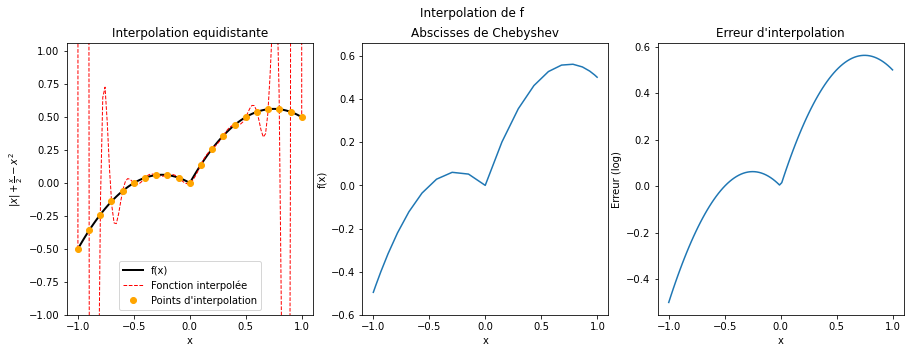

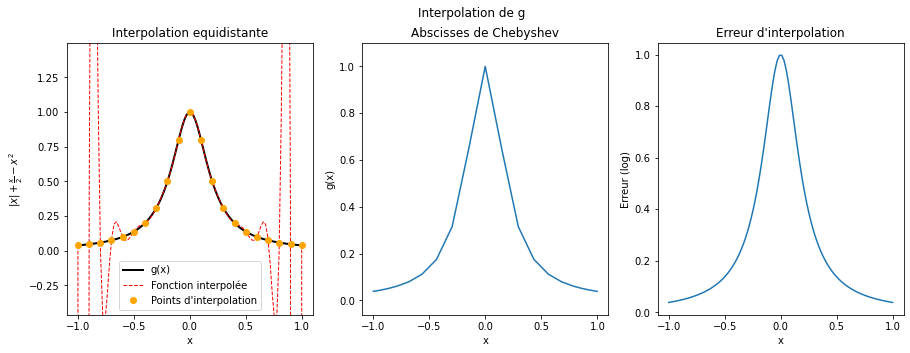

In [79]:
from matplotlib.pyplot import plot


def f(x):
    return np.abs(x) + x / 2 - x**2


def g(x):
    return 1 / (1 + 25 * x**2)


n = 20
plot_x = np.linspace(-1, 1, 100)

def plot_interpolation_method(title, plot_y, y_label, fun_label, subp_idx, generated_x, y_toMatch, interp_y):
    """Plot the function and its interpolation on the same plot

    Args:
        title : title of the plot
        plot_y : f(plot_x) where f is the function to interpolate
        y_label : label of y axis
        fun_label : label of the function
        subp_idx : index of subplot 
        generated_x : points used for the interpolation method (i.e. equidistant, Tchebycheff...)
        y_toMatch : values of y to attein i.e. constraints to satisfy
        interp_y : interpolated points of function
    """
    plt.subplot(1, 3, subp_idx)
    plt.title(title)
    plt.ylim(np.min(plot_y) - 0.5 , np.max(plot_y) + 0.5)
    plt.xlabel("x")
    plt.ylabel(y_label)
    plt.plot(plot_x, func(plot_x), '-k' ,label=fun_label, linewidth=2)
    plt.plot(plot_x, interp_y, '--', color="r", label="Fonction interpolée", linewidth=1)
    plt.plot(generated_x, y_toMatch, "o", color="orange", label="Points d'interpolation", linewidth=1)
    
    plt.legend()
    

for func in [f, g]:
    # Points d'interpolation équidistants
    x_equidist = equidistant_points(n)
    y_equidist = func(x_equidist)
    # Polynôme interpolée
    p_equidist = interpolation_lagrange(plot_x, x_equidist, y_equidist)

    # Points d'interpolation Chebyshev
    x_chebyshev = chebyshev_points(n)
    y_chebyshev = func(x_chebyshev)
    # Polynôme interpolée
    p_chebyshev = interpolation_lagrange(plot_x, x_chebyshev, y_chebyshev)
    # images des x dans plot_x
    plot_y, fun_label = func(plot_x), f"{func.__name__}(x)"
    
    # Creation de la figure
    plt.figure(figsize=(15, 5))
    plt.suptitle(f"Interpolation de {func.__name__}")

    # Interpolation équidistante
    """ ax_eq = plt.subplot(1, 3, 1)
    plt.title("Interpolation equidistante")
    plt.ylim(np.min(y_equidist) - 0.1, np.max(y_equidist) + 0.1)
    plt.xlabel("x")
    plt.ylabel(f"{func.__name__}(x)")
    # ÉCRIVEZ VOTRE SOLUTION ICI
    plt.plot(x_equidist, y_equidist) """
    plot_interpolation_method("Interpolation equidistante", plot_y, r"""$|x| + \frac{x}{2} - x^2$""", fun_label, 1, x_equidist, y_equidist, p_equidist)

    # Interpolation Chebyshev
    plt.subplot(1, 3, 2)
    plt.title("Abscisses de Chebyshev")
    plt.ylim(np.min(y_equidist) - 0.1, np.max(y_equidist) + 0.1)
    plt.xlabel("x")
    plt.ylabel(f"{func.__name__}(x)")
    # ÉCRIVEZ VOTRE SOLUTION ICI
    plt.plot(x_chebyshev, y_chebyshev)

    # Trace de l'erreur entre la fonction et les deux polynôme interpolée
    plt.subplot(1, 3, 3)
    plt.title("Erreur d'interpolation")
    plt.xlabel("x")
    plt.ylabel("Erreur (log)")
    # ÉCRIVEZ VOTRE SOLUTION ICI
    plt.plot(plot_x, func(plot_x))



---
__Reflexion__ : Quel est l'avantage d'utiliser des points de Chebychev comparé aux points équidistants pour calculer un polynôme d'interpolation ? 

---

## Exercice 3 : Formule de Newton
On peut aussi construire un polynôme d'interpolation en utilisant la formule de Newton
$$
    p_n(x) = c_0 + c_1(x-x_0) +
    c_2(x-x_0)(x-x_1)+\cdots+c_n(x-x_0)\cdots(x-x_{n-1}),
$$
où 
$$
    c_k = \delta^k y[x_0,x_1,\dots,x_k],\quad \text{pour}\quad  k=0,\dots,n,
$$
sont les différences divisées (voir la Définition 1.2 dans le polycopié du cours).

### Exercice 3 a)
---
> Écrivez une fonction `differences_divisees(x, y)` qui produit le tableau des différences divisées pour $x,y$. 
>
>$$
\begin{matrix}
y_{0} \\ 
y_{1} & δ y[x_{0}, x_{1}] \\ 
y_{2} & δ y[x_{1}, x_{2}] & δ^{2} y[x_{0}, x_{1}, x_{2}]\\ 
y_{3} & δ y[x_{2}, x_{3}] & δ^{2} y[x_{1}, x_{2}, x_{3}] 
  & δ^{3} y[x_{0}, x_{1}, x_{2}, x_{3}]
\end{matrix}
$$
>
>On remarquera que la première colonne du tableau doit être `y`, et le tableau doit être triangulaire inférieur.
---

In [15]:
def differences_divisees(x, y):
    """Calculer le tableau des differences divisees"""
    n = len(x)
    assert len(x) == len(y)
    delta = np.zeros((n, n))  # initialisation du tableau avec des zeros

    # ÉCRIVEZ VOTRE SOLUTION ICI


In [16]:
def test_differences_divisees():
    x = np.linspace(0, 1, 10)
    y = np.sin(x)
    delta = differences_divisees(x, y)
    assert delta.shape == (len(x), len(y)), "La matrice n'a pas la bonne taille"
    assert np.allclose(delta[:, 0], y), "La premiere colonne n'est pas correcte"
    assert np.all(np.tril(delta) == delta), "La matrice n'est pas triangulaire"
    assert (
        np.abs(np.sum(delta) - 9.42591837985752) < 1e-6
    ), "Quelque chose est mal"


test_differences_divisees()


AttributeError: 'NoneType' object has no attribute 'shape'

### Exercice 3 b)
---
> Écrivez une fonction `x_newton(x, x_inter)` qui calcule tous les polynômes
$$
(x-x_0)(x-x_1)\cdots (x-x_{k-1}), k=1, ..., n, 
$$
> qui apparaissent dans la formule d'interpolation de Newton évalués aux points `x`. La fonction doit retourner une matrice de taille `(len(x), len(x_inter))`.
---

In [ ]:
def x_newton(x, x_inter):
    """Calculer les produits de coefficients pour le polynome de Newton"""
    # ÉCRIVEZ VOTRE SOLUTION ICI


def test_x_newton():
    x = np.linspace(0, 1, 10)
    x_inter = np.linspace(0, 1, 5)
    result = x_newton(x, x_inter)
    assert result.shape == (
        len(x),
        len(x_inter),
    ), "La matrice n'a pas la bonne taille"
    assert np.allclose(
        result[:, 0], np.ones(len(x))
    ), "La premiere colonne n'est pas correcte"
    assert (
        np.linalg.norm(result[0, 1:]) < 1e-6
    ), "Si x=0, la resultat doit etre (1,0,...,0)"
    assert (
        np.abs(np.sum(result) - 18.152963534522176) < 1e-6
    ), "Quelque chose est mal"


test_x_newton()


### Exercice 3 c)
---
> En utilisant `differences_divisees` et `x_newton`, écrivez une fonction `interpolation_newton(x, x_inter, y_inter)` qui effectue une interpolation de Newton en utilisant les points d'interpolation `(x_inter, y_inter)` et qui l'évalue aux points d'abscisse `x`. 
---

In [ ]:
def interpolation_newton(x, x_inter, y_inter):
    """Calculer le polynome de Newton pour les points x_i et y_i"""
    # ÉCRIVEZ VOTRE SOLUTION ICI
    coeffs = np.diag(differences_divisees(x_inter, y_inter))
    p_newton = x_newton(x, x_inter) @ coeffs
    return p_newton


test_interpolation(interpolation_newton, "Newton")


### Exercice 3 d)
---
> $\star$ __Bonus:__ Écrire une fonction `differences_divisees_update(delta, x_inter, x_new, y_new)` qui calcule les différences divisées de $(x_0,\dots,x_{n+1}),(y_0,\dots,y_{n+1})$ étant donné la table de différences divisées pour $(x_0,\dots,x_{n}),(y_0,\dots,y_n)$.
---

---
__Reflexion__: Quel est l'avantage d'utiliser la formule de Newton comparé à la formule de Lagrange ? 

---

In [ ]:
def differences_divisees_update(delta, x_inter, x_new, y_new):
    """Calculer le tableau des differences divisees"""
    n = delta.shape[0]

    # ÉCRIVEZ VOTRE SOLUTION ICI


In [ ]:
def test_differences_divisees_update():
    x = np.linspace(0, 1, 10)
    y = np.sin(x)
    delta = differences_divisees(x[:-1], y[:-1])
    delta_true = differences_divisees(x, y)

    delta_new = differences_divisees_update(delta, x[:-1], x[-1], y[-1])
    assert np.allclose(delta_new, delta_true)


test_differences_divisees_update()


## Exercice 4 : Interpolation de Hermite

L'interpolation d'Hermite utilise la même idée que l'interpolation de Newton, mais au lieu d'interpoler les valeurs des fonctions, nous interpolons en plus les dérivées des fonctions. Nous pouvons aussi utiliser la formule de Newton pour calculer l'interpolant d'Hermite, mais avec un tableau de différences divisées modifiée, voir la formule (1.14) dans le polycopié. 

On nous donne les points de données $(x_i, y_i)$ et $(x_i, y_i')$ pour $i=0,\dots,n$. À partir de ces données, nous construisons un tableau des différences divisées de $2n\times 2n$. La première colonne est de la forme $(y_0,y_0,y_1,y_1,\dots,y_n,y_n)$, et la deuxième colonne est de la forme $(y_0',y_1,y_0',y_1,\dots,y_n,y_n')$. Les autres colonnes sont calculées de la même manière que dans l'interpolation de Newton.

$$
\begin{matrix}
y_{0} \\ 
y_{0} & δ y[x_{0}, x_{0}] = y_{0}'\\ 
y_{1} & δ y[x_{0}, x_{1}] & δ^{2} y[x_{0}, x_{0}, x_{1}] \\ 
y_{1} & δ y[x_{1}, x_{1}]= y_{1}' & δ^{2} y[x_{0}, x_{1}, x_{1}] & 
δ^{3} y[x_{0}, x_{0}, x_{1}, x_{1}]
\end{matrix}
$$

### Exercice 4 a)
---
> Implémenter la fonction `differences_divisees_hermite` qui calcule la table des différences divisées pour l'interpolation d'Hermite.
> 
> Vous pouvez utiliser la fonction `double_array` pour créer un vecteur/tableau où chaque élément est répété deux fois.
>
>__Astuce__ : Vous pouvez vérifier si un nombre `i` est impair en utilisant `i % 2 == 1`. Ici, `%` est l'opérateur modulo.

---

In [ ]:
def double_array(x):
    """Repéter chaque élément de x deux fois"""
    x_double = np.zeros(2 * len(x))
    x_double[::2] = x
    x_double[1::2] = x
    return x_double


def differences_divisees_hermite(x_inter, y_inter, y_inter_derivee):
    """
    Calculer le tableau des differences divisees pour l'interpolation hermite

    x_inter: points d'interpolation
    y_inter: valeurs de la fonction en x_inter
    y_inter_derivee: valeurs de la derivee de la fonction en x_inter
    """
    n = len(x_inter)
    assert len(x_inter) == len(y_inter)
    delta = np.zeros((2 * n, 2 * n))  # initialisation du tableau avec des zeros

    x_double = double_array(x_inter)

    # ÉCRIVEZ VOTRE SOLUTION ICI


In [ ]:
def test_differences_divisees_hermite():
    size = 4
    x = np.linspace(0, 1, size)
    y = np.sin(x)
    y_der = np.cos(x)
    delta = differences_divisees_hermite(x, y, y_der)
    assert delta.shape == (
        2 * size,
        2 * size,
    ), "La matrice n'a pas la bonne taille"
    assert np.allclose(
        delta[:, 0], double_array(y)
    ), "La premiere colonne n'est pas correcte"
    assert np.all(np.tril(delta) == delta), "La matrice n'est pas triangulaire"
    assert np.all(
        delta[1::2, 1] == y_der
    ), "La deuxieme colonne n'est pas correcte"
    assert (
        np.abs(np.sum(delta) - 7.3804764828515905) < 1e-6
    ), "Quelque chose est mal"


test_differences_divisees_hermite()


### Exercice 4 b)
---
> Implémenter la fonction `interpolation_hermite` qui calcule l'interpolant d'Hermite en utilisant la fonction `differences_divisees_hermite`.
--- 

In [ ]:
def interpolation_hermite(x, x_inter, y_inter, y_derivee):
    """Calcule le polynome de Newton pour les points x_i et y_i"""

    # ÉCRIVEZ VOTRE SOLUTION ICI


In [ ]:
def test_interpolation_hermite():
    def plot_func(x):
        return np.sin(x) ** 2 - np.exp(x / 10)

    def plot_func_derivee(x):
        return 2 * np.sin(x) * np.cos(x) - np.exp(x / 10) / 10

    n_points = 5
    x = np.linspace(0, 2 * np.pi, n_points)
    y = plot_func(x)
    y_derivee = plot_func_derivee(x)
    x_plot = np.linspace(-0.3, 2.1 * np.pi, 100)
    y_plot = interpolation_hermite(x_plot, x, y, y_derivee)
    y_vrais = plot_func(x_plot)
    plt.plot(x_plot, y_plot, label="Fonction interpolée")
    plt.plot(x, y, "o", label="Points d'interpolation")
    plt.plot(x_plot, y_vrais, label="Vraie fonction")
    plt.legend()
    plt.title("Interpolation de Hermite")


test_interpolation_hermite()
